In [1]:
import pandas as pd
import numpy as np

#Librerias Machine Learning y modelado
from pycaret.classification import *
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

#Librerias para visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df_modelo = pd.read_csv("/home/daniel_cardenas/Desarrollo/Repositorios/Modelos_Deterioro_NIIF9/data/processed/datos_modelado.csv")
df_modelo.columns

Index(['NIT', 'Total_facturado', 'Total_por_pagar', 'Total_pagado',
       'Cantidad_facturas', 'Dias_mora_promedio', 'Porcentaje_pagos_tiempo',
       'Promedio_ratio_pago', 'Desv_dias_demora', 'Maximo_dias_demora',
       'Facturas_vencidas', 'Factura_promedio', 'Porcentaje_facturas_vencidas',
       'score_credito', 'categoria_riesgo', 'default', 'PERIODO',
       'FECHA_CORTE', 'ACTIVOS_CORRIENTES', 'GANANCIAS', 'PATRIMONIO',
       'TOTAL_ACTIVOS', 'ACTIVOS_NO_CORRIENTES', 'PASIVOS_NO_CORRIENTES',
       'TOTAL_PASIVOS', 'VAR_ACTIVOS_CORRIENTES', 'VAR_GANANCIAS',
       'VAR_PATRIMONIO', 'VAR_ACTIVOS', 'VAR_Activos_NO_CORRIENTES',
       'VAR_PASIVOS_NO_CORRIENTES', 'VAR_TOTAL_PASIVOS', 'PASIVOS_CORRIENTES',
       'VAR_PASIVOS_CORRIENTES', 'UTILIDAD_NETA', 'LIQUIDEZ_CORRIENTE',
       'CAPITAL_TRABAJO', 'ENDEUDAMIENTO', 'ROA'],
      dtype='object')

In [3]:
X = df_modelo.drop(columns = ['default','NIT','FECHA_CORTE','PERIODO','Maximo_dias_demora','Dias_mora_promedio'])
y = df_modelo['default'] 

In [4]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

train_data = pd.concat([train_X, train_y], axis=1)
test_data = pd.concat([test_X, test_y], axis=1)

In [5]:
# Reemplazar valores infinitos por NaN para usar métodos de imputación estándar
train_data_replaced = train_data.replace([np.inf, -np.inf], np.nan)

# O reemplazar por un valor específico, como el valor máximo de la columna
#for col in train_data_replaced.columns:
#    if train_data_replaced[col].dtype != 'object': # Solo para columnas numéricas
#        max_val = train_data_replaced[col].max()
#        train_data_replaced[col] = train_data_replaced[col].replace([np.inf, -np.inf, np.nan], max_val)

# Ahora usa train_data_replaced en tu setup


In [6]:
test_data_replaced = test_data.replace([np.inf, -np.inf], np.nan)

In [7]:
# 4. Configura PyCaret
clf = setup(
    data=train_data_replaced,
    target='default',
    session_id=123,
    normalize=True,
    fix_imbalance=True,
    fix_imbalance_method='SMOTE',
    fold=3,
    categorical_features=['categoria_riesgo'],
    verbose=True
)

,Description,Value
0,Session id,123
1,Target,default
2,Target type,Binary
3,Original data shape,"(2157, 34)"
4,Transformed data shape,"(3556, 38)"
5,Transformed train set shape,"(2908, 38)"
6,Transformed test set shape,"(648, 38)"
7,Numeric features,32
8,Categorical features,1
9,Rows with missing values,63.7%


In [8]:
best_model = compare_models(include=['xgboost','rf','lr','dt'],turbo=True)
final_model = finalize_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9914,0.9968,0.9084,0.8686,0.8850,0.8806,0.8824,2.6433
rf,Random Forest Classifier,0.9854,0.9942,0.7992,0.7992,0.7992,0.7917,0.7917,1.3800
dt,Decision Tree Classifier,0.9848,0.8950,0.7982,0.7840,0.7902,0.7823,0.7828,0.1267
lr,Logistic Regression,0.9788,0.9755,0.8899,0.6550,0.7541,0.7433,0.7531,0.1267


In [9]:
test_predictions = predict_model(final_model, data=test_data_replaced)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9963,0.9987,0.9500,0.9500,0.9500,0.9481,0.9481


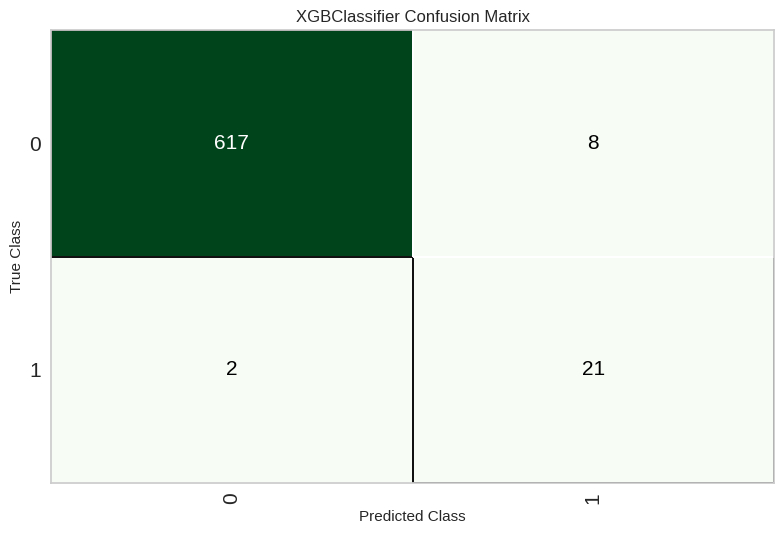

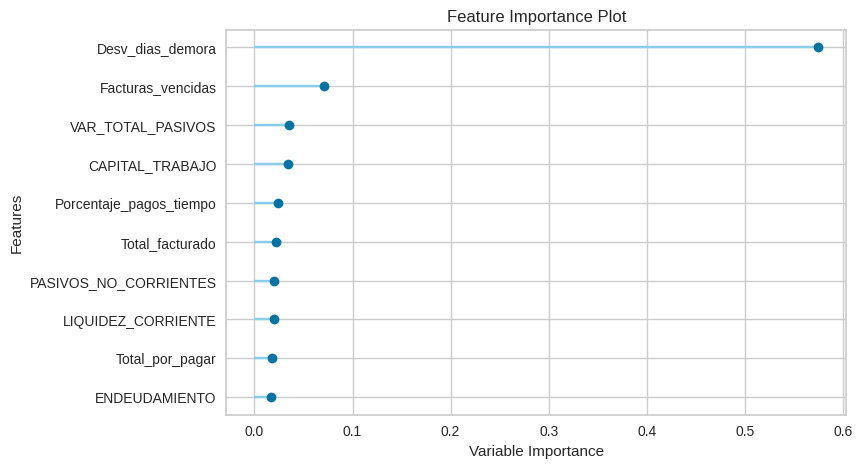

In [10]:
plot_model(final_model, plot='confusion_matrix')
plot_model(final_model,plot='feature')

--- ajustado

In [11]:
tuned_model = tune_model(final_model,optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9841,0.9981,1.0000,0.6923,0.8182,0.8102,0.8252
1,0.9881,0.9963,0.8889,0.8000,0.8421,0.8359,0.8372
2,0.9781,0.9963,0.9474,0.6429,0.7660,0.7549,0.7706
Mean,0.9834,0.9969,0.9454,0.7117,0.8087,0.8003,0.8110
Std,0.0041,0.0008,0.0454,0.0656,0.0318,0.0338,0.0290


Fitting 3 folds for each of 10 candidates, totalling 30 fits


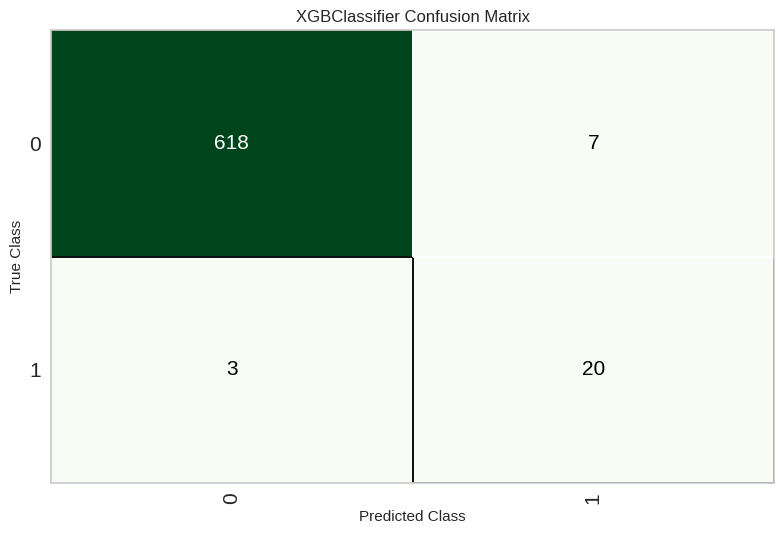

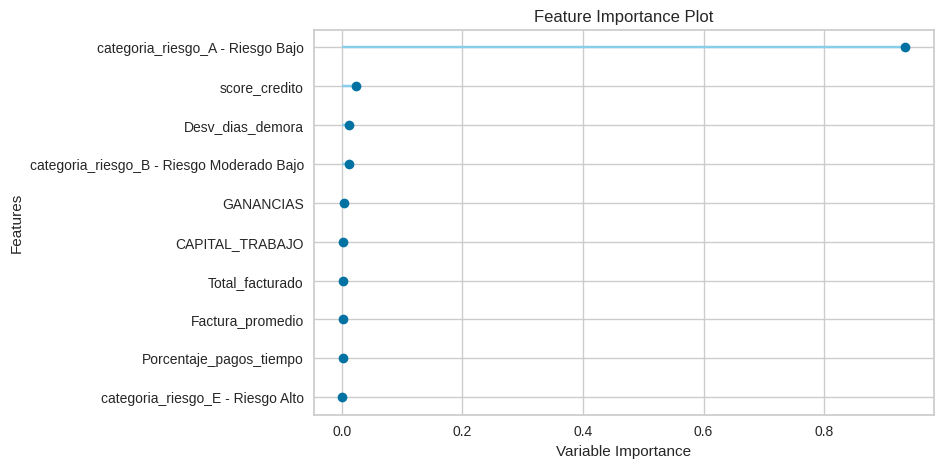

In [12]:
plot_model(tuned_model, plot='confusion_matrix')
plot_model(tuned_model,plot='feature')

# modelo 2


In [13]:
X_2 = df_modelo.drop(columns=['default','NIT','FECHA_CORTE','PERIODO','categoria_riesgo'])
y_2 = df_modelo['default']

In [14]:
train_X_2, test_X_2, train_y_2, test_y_2 = train_test_split(X_2, y_2, test_size=0.2, stratify=y, random_state=123)

train_data = pd.concat([train_X_2, train_y_2], axis=1)
test_data = pd.concat([test_X_2, test_y_2], axis=1)

In [15]:
test_data_replaced_2 = test_data.replace([np.inf, -np.inf], np.nan)
train_data_replaced_2 = train_data.replace([np.inf, -np.inf], np.nan)

In [16]:
clf = setup(
    data=train_data_replaced_2,
    target='default',
    session_id=123,
    normalize=True,
    #transformation=True,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.9,
    #fix_imbalance=True,
    feature_selection=True,
    fix_imbalance_method='SMOTE',
    verbose=True,
    n_jobs=1,
    fold=5
)

[LightGBM] [Info] Number of positive: 55, number of negative: 1454
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000525 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4794
[LightGBM] [Info] Number of data points in the train set: 1509, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036448 -> initscore=-3.274740
[LightGBM] [Info] Start training from score -3.274740
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

,Description,Value
0,Session id,123
1,Target,default
2,Target type,Binary
3,Original data shape,"(2157, 35)"
4,Transformed data shape,"(2157, 7)"
5,Transformed train set shape,"(1509, 7)"
6,Transformed test set shape,"(648, 7)"
7,Numeric features,34
8,Rows with missing values,63.7%
9,Preprocess,True


In [17]:
best_model_2 = compare_models(include=['xgboost','rf','lr','dt'],turbo=True)
final_model_2 = finalize_model(best_model_2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9993,0.9999,0.9818,1.0000,0.9905,0.9901,0.9904,0.3540
dt,Decision Tree Classifier,0.9987,0.9993,1.0000,0.9692,0.9833,0.9826,0.9833,0.2460
rf,Random Forest Classifier,0.9974,1.0000,0.9636,0.9692,0.9643,0.9629,0.9641,0.6180
lr,Logistic Regression,0.9947,0.9990,0.9091,0.9492,0.9252,0.9225,0.9246,0.2480


In [18]:
test_predictions_2 = predict_model(final_model_2, data=test_data_replaced_2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [19]:
plot_model(final_model_2, plot='feature')

ValueError: All arrays must be of the same length

In [ ]:
print("📊 Classification Report (Test Set):\n")
print(classification_report(test_data_replaced_2['default'], test_predictions_2['prediction_label']))

In [ ]:
auc = roc_auc_score(test_data_replaced_2['default'], test_predictions_2['prediction_score'])
print(f"\n🎯 AUC: {auc:.4f}")

In [ ]:
plot_model(final_model, plot='confusion_matrix')

# --- Pruebas de pycaret   

In [1]:
import pandas as pd
import numpy as np

#Librerias Machine Learning y modelado
from pycaret.classification import *
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

#Librerias para visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("/home/daniel_cardenas/Desarrollo/Repositorios/Modelos_Deterioro_NIIF9/data/processed/datos_modelado.csv")
df

,NIT,Total_facturado,Total_por_pagar,Total_pagado,Cantidad_facturas,Dias_mora_promedio,Porcentaje_pagos_tiempo,Promedio_ratio_pago,Desv_dias_demora,Maximo_dias_demora,...,VAR_Activos_NO_CORRIENTES,VAR_PASIVOS_NO_CORRIENTES,VAR_TOTAL_PASIVOS,PASIVOS_CORRIENTES,VAR_PASIVOS_CORRIENTES,UTILIDAD_NETA,LIQUIDEZ_CORRIENTE,CAPITAL_TRABAJO,ENDEUDAMIENTO,ROA
0,00019431b6126f9b9bb9bae1c0b02635843eb251e1c887...,2998928.0,0.0,2998928.0,7,-3.29,1.00,1.0,20.38,28,...,1.145843,-18.769967,-0.900528,10407888.0,1.018053,-14049.0,1.27,2787696.0,0.55,-0.07
1,0018bd0b9cac8d76713b97535738e3004c44cc80821907...,113640820.0,0.0,113640820.0,55,-13.75,1.00,1.0,12.20,24,...,-27.540656,105.383509,49.703396,54741611.0,36.085837,-4091118.0,1.64,34873515.0,0.74,-4.02
2,00590f245f22ca6dc9fe272c2e79747bd8da43ff1ab6e3...,783439.0,0.0,783439.0,2,-3.00,1.00,1.0,32.53,20,...,-5.832260,283.511847,-82.874431,1415560.0,-83.274561,1946810.0,4.76,5328951.0,0.16,20.85
3,007025963bf2a2d6fa88441ff1badad81eaef22e2250b1...,90224784.0,0.0,90224784.0,46,4.17,0.85,1.0,23.58,60,...,NaN,-88.550619,132.420249,6112169.0,155.140722,9750.0,1.12,747483.0,0.90,0.14
4,0074eeb2e1a555937c7c58c80149c49411855b1b8d7210...,773500.0,0.0,773500.0,1,-24.00,1.00,1.0,NaN,-24,...,-10.000000,NaN,97.154531,8253350.0,97.154531,23749.0,1.18,1510643.0,0.84,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692,ff0fed0ec7bc5111bb359a15edb5a9a26fbdaaf2458536...,78420027.0,0.0,78420027.0,42,109.62,0.55,1.0,210.87,643,...,2.815248,9.262728,9.966262,1103051.0,12.677525,987841.0,3.30,2539694.0,0.18,3.39
2693,ff2af7e59c68fe36e3f26a57b09c31f5e253c034caf4ec...,595000.0,0.0,595000.0,1,-28.00,1.00,1.0,NaN,-28,...,7.268754,48.867765,-20.337541,422013.0,-31.948315,-436545.0,3.45,1035182.0,0.25,-19.16
2694,ff5e722d76b3a04971c96121480927056670c9e8e837a2...,773500.0,0.0,773500.0,1,-25.00,1.00,1.0,NaN,-25,...,3.155528,-26.587449,-34.372594,8788885.0,-34.400761,-366798.0,1.21,1837058.0,0.80,-3.33
2695,ff77cd42eca6ea173ea6080a3ae568580b632dd946238c...,161200152.0,0.0,161200152.0,39,5.82,0.87,1.0,38.11,141,...,-0.581524,NaN,73.718380,5488660.0,73.718380,488276.0,1.72,3924437.0,0.50,4.41


In [3]:
df.columns

Index(['NIT', 'Total_facturado', 'Total_por_pagar', 'Total_pagado',
       'Cantidad_facturas', 'Dias_mora_promedio', 'Porcentaje_pagos_tiempo',
       'Promedio_ratio_pago', 'Desv_dias_demora', 'Maximo_dias_demora',
       'Facturas_vencidas', 'Factura_promedio', 'Porcentaje_facturas_vencidas',
       'score_credito', 'categoria_riesgo', 'default', 'PERIODO',
       'FECHA_CORTE', 'ACTIVOS_CORRIENTES', 'GANANCIAS', 'PATRIMONIO',
       'TOTAL_ACTIVOS', 'ACTIVOS_NO_CORRIENTES', 'PASIVOS_NO_CORRIENTES',
       'TOTAL_PASIVOS', 'VAR_ACTIVOS_CORRIENTES', 'VAR_GANANCIAS',
       'VAR_PATRIMONIO', 'VAR_ACTIVOS', 'VAR_Activos_NO_CORRIENTES',
       'VAR_PASIVOS_NO_CORRIENTES', 'VAR_TOTAL_PASIVOS', 'PASIVOS_CORRIENTES',
       'VAR_PASIVOS_CORRIENTES', 'UTILIDAD_NETA', 'LIQUIDEZ_CORRIENTE',
       'CAPITAL_TRABAJO', 'ENDEUDAMIENTO', 'ROA'],
      dtype='object')

In [4]:
df = df.drop(columns=['NIT','PERIODO','FECHA_CORTE','score_credito','categoria_riesgo','Dias_mora_promedio','Desv_dias_demora','Maximo_dias_demora'])

In [5]:
df = df.replace([np.inf, -np.inf], np.nan)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697 entries, 0 to 2696
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Total_facturado               2697 non-null   float64
 1   Total_por_pagar               2697 non-null   float64
 2   Total_pagado                  2697 non-null   float64
 3   Cantidad_facturas             2697 non-null   int64  
 4   Porcentaje_pagos_tiempo       2697 non-null   float64
 5   Promedio_ratio_pago           2697 non-null   float64
 6   Facturas_vencidas             2697 non-null   int64  
 7   Factura_promedio              2697 non-null   float64
 8   Porcentaje_facturas_vencidas  2697 non-null   float64
 9   default                       2697 non-null   int64  
 10  ACTIVOS_CORRIENTES            2697 non-null   float64
 11  GANANCIAS                     2697 non-null   float64
 12  PATRIMONIO                    2697 non-null   float64
 13  TOT

In [ ]:
pycaret_setup = setup(data=df,
                    target='default',
                    session_id = 123,
                    train_size= 0.8,
                    normalize=True,
                    normalize_method='minmax',
                    fix_imbalance=True,
                    fix_imbalance_method='smote'
                    fold = 5
                    )

,Description,Value
0,Session id,123
1,Target,default
2,Target type,Binary
3,Original data shape,"(2697, 31)"
4,Transformed data shape,"(2697, 31)"
5,Transformed train set shape,"(2157, 31)"
6,Transformed test set shape,"(540, 31)"
7,Numeric features,30
8,Rows with missing values,21.2%
9,Preprocess,True


In [9]:
best_model = compare_models(include=['xgboost','dt','lr','rf'],fold=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:08:17
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9680,0.9383,0.1667,0.8148,0.2643,0.2556,0.3432,0.2900
xgboost,Extreme Gradient Boosting,0.9652,0.9446,0.2821,0.5722,0.3678,0.3521,0.3801,2.1833
lr,Logistic Regression,0.9629,0.9292,0.0128,0.3333,0.0247,0.0212,0.0584,0.0633
dt,Decision Tree Classifier,0.9499,0.6840,0.3974,0.3438,0.3673,0.3415,0.3432,0.9533


In [10]:
print(best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [11]:
tuned_best_model = tune_model(best_model, fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9638,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9638,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9638,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.9638,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
Std,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [12]:
print(tuned_best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [13]:
predict_model (tuned_best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9685,0.9662,0.1500,1.0000,0.2609,0.2537,0.3811


,Total_facturado,Total_por_pagar,Total_pagado,Cantidad_facturas,Porcentaje_pagos_tiempo,Promedio_ratio_pago,Facturas_vencidas,Factura_promedio,Porcentaje_facturas_vencidas,ACTIVOS_CORRIENTES,...,PASIVOS_CORRIENTES,VAR_PASIVOS_CORRIENTES,UTILIDAD_NETA,LIQUIDEZ_CORRIENTE,CAPITAL_TRABAJO,ENDEUDAMIENTO,ROA,default,prediction_label,prediction_score
1288,1621719.0,0.0,1621719.0,3,1.00,1.00,0,540573.0,0.00,2024463.0,...,2102594.0,39.794369,-300997.0,0.96,-78131.0,0.79,-10.960000,0,0,1.00
940,540573.0,0.0,540573.0,1,1.00,1.00,0,540573.0,0.00,33222422.0,...,14269431.0,43.247028,-1893668.0,2.33,18952992.0,1.23,-1.190000,0,0,1.00
1402,838238976.0,0.0,838238976.0,45,1.00,1.00,0,18627532.0,0.00,4428419.0,...,75909.0,588.766907,553905.0,58.34,4352510.0,0.02,12.510000,0,0,0.90
342,540573.0,0.0,540573.0,1,1.00,1.00,0,540573.0,0.00,4476091.0,...,974335.0,-20.156370,-32349.0,4.59,3501756.0,0.06,-0.130000,0,0,1.00
74,252537200.0,5928878.0,246608320.0,53,0.98,0.98,1,4764853.0,0.02,17754716.0,...,2544693.0,68.793007,-31561636.0,6.98,15210024.0,0.44,-12.310000,0,0,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,492729.0,0.0,492729.0,1,1.00,1.00,0,492729.0,0.00,123805448.0,...,3993520.0,64.799080,-3204707.0,31.00,119811928.0,0.93,-2.210000,0,0,1.00
1,113640816.0,0.0,113640816.0,55,1.00,1.00,0,2066197.0,0.00,89615128.0,...,54741612.0,36.085838,-4091118.0,1.64,34873516.0,0.74,-4.020000,0,0,0.98
57,540573.0,0.0,540573.0,1,1.00,1.00,0,540573.0,0.00,6057209.0,...,2434009.0,8.900552,1671060.0,2.49,3623200.0,0.34,21.940001,0,0,1.00
916,1441982.0,0.0,1441982.0,2,1.00,1.00,0,720991.0,0.00,22261304.0,...,8431039.0,-23.164246,897725.0,2.64,13830265.0,0.38,3.540000,0,0,1.00


In [ ]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [15]:
dashboard(tuned_best_model, display_format='inline')

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Cal